In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [18]:
# X is the 10x10 Hilbert matrix
X = 1 / (np.arange(1,11)+np.arange(0,10)[:,np.newaxis])
y = np.ones(10)

In [19]:
num_alphas = 200
alphas = np.logspace(-10,-2,num_alphas)

In [20]:
# Return numbers spaced evenly on a log scale   
# numpy.logspace(start, stop, num=50, endpoint=True, base=10.0, dtype=None, axis=0)

In [21]:
coef = []
for a in alphas:
    ridge = linear_model.Ridge(alpha=a, fit_intercept=False)
    ridge.fit(X,y)
    coef.append(ridge.coef_)

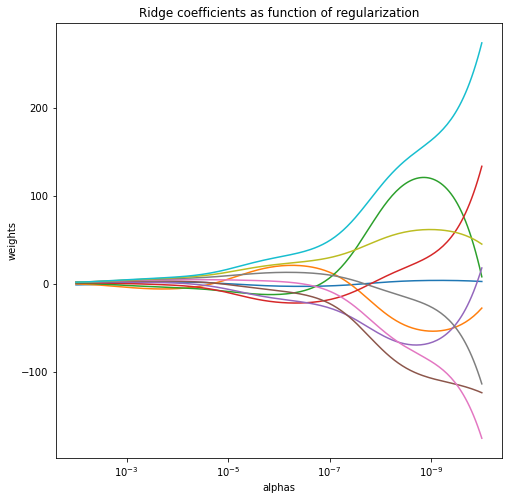

In [29]:
fig, ax = plt.subplots(figsize=(8,8))
ax.plot(alphas, coef)
ax.set_xscale('log')
ax.set(xlabel='alphas',ylabel='weights', title='Ridge coefficients as function of regularization')
# reverse the x-axis
ax.set_xlim(ax.get_xlim()[::-1])
plt.show()

Each color represents a different feature of the coefficient vector, and this is displayed as a function of the regularization parameter.

For highly ill-conditioned matrices, a slight change in the target variable can cause huge variances in the calculated weights. 
In such cases, it is useful to set a certain regularization (alpha) to reduce this variation (noise).
    
When alpha is very large, the regularization effect dominates the squared loss function and the coefficients tend to zero. At the end of the path, as alpha tends toward zero and the solution tends towards the ordinary least squares, coefficients exhibit big oscillations.
In practise it is necessary to tune alpha in such a way that a balance is maintained between both.